/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1862
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0188
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2314e-04
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8725e-04
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3761e-04
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3913e-04
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4551e-04
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1506e-04
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4589e-04
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6617e-04
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7708e-04
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1919e-04
Epoch 15/100
28/28 ━━━━━━━━━━━━

<ipython-input-1-79efa616731d>:71: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


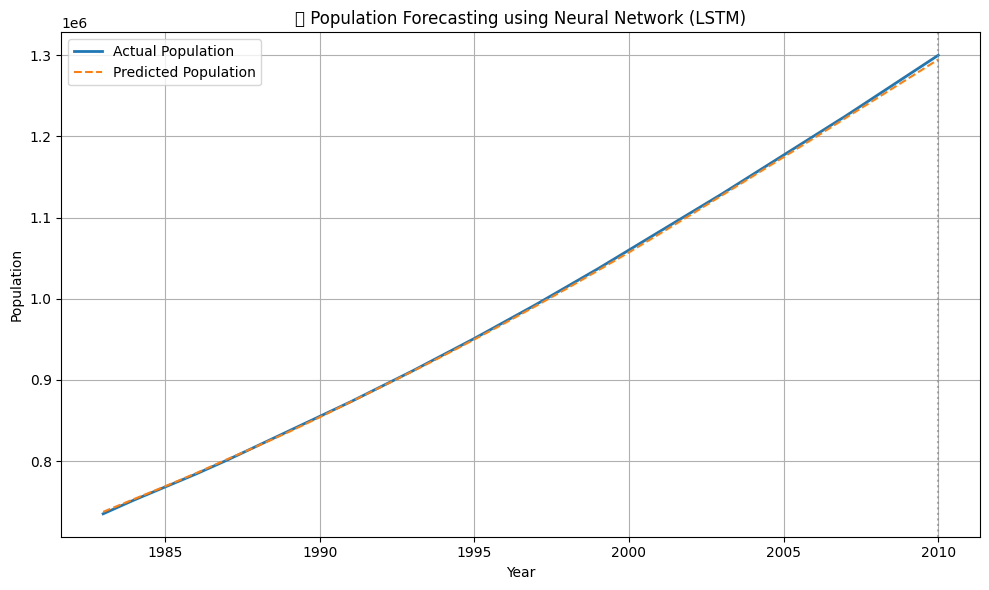

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# ----- Step 1: Create Dataset -----
# Population data (you can replace with real data if needed)
population = np.array([
    689000, 705000, 720000, 735000, 752000, 768000, 784000, 801000, 819000, 837000,
    855000, 873000, 892000, 911000, 931000, 951000, 972000, 993000, 1015000, 1037000,
    1060000, 1083000, 1106000, 1129000, 1153000, 1177000, 1201000, 1225000, 1250000,
    1275000, 1300000
])
years = np.arange(1980, 1980 + len(population))

# Create DataFrame
df = pd.DataFrame({'Year': years, 'Population': population})

# ----- Step 2: Normalize the Data -----
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Population']])

# ----- Step 3: Create Time Series Dataset -----
def create_dataset(data, time_step=3):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 3
X, y = create_dataset(scaled_data, time_step)

# Reshape input to [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# ----- Step 4: Build the LSTM Model -----
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# ----- Step 5: Train the Model -----
model.fit(X, y, epochs=100, batch_size=1, verbose=1)

# ----- Step 6: Predict the Next Population Value -----
last_input = scaled_data[-time_step:]
last_input = last_input.reshape(1, time_step, 1)
predicted_scaled = model.predict(last_input)
predicted = scaler.inverse_transform(predicted_scaled)

print(f"\n📈 Predicted next year's population: {predicted[0][0]:,.0f}")

# ----- Step 7: Plot the Results -----
train_predict = model.predict(X)
train_predict_plot = scaler.inverse_transform(train_predict)
actual_plot = df['Population'].values[time_step:]

plt.figure(figsize=(10, 6))
plt.plot(df['Year'][time_step:], actual_plot, label='Actual Population', linewidth=2)
plt.plot(df['Year'][time_step:], train_predict_plot, label='Predicted Population', linestyle='--')
plt.axvline(df['Year'].iloc[-1], color='gray', linestyle=':', alpha=0.6)
plt.title("📊 Population Forecasting using Neural Network (LSTM)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()